In [ ]:
%matplotlib inline



# Reading XDF EEG data

Here we read some sample XDF data. Although we do not analyze it here, this
recording is of a short parallel auditory response (pABR) experiment
:footcite:`PolonenkoMaddox2019` and was provided by the `Maddox Lab
<https://www.urmc.rochester.edu/labs/maddox.aspx>`__.


In [ ]:
# Authors: Clemens Brunner <clemens.brunner@gmail.com>
#          Eric Larson <larson.eric.d@gmail.com>
#
# License: BSD-3-Clause

Using default location ~/mne_data for misc...
Dataset misc version 0.0 out of date, latest version is 0.23


0.00B [00:00, ?B/s]     
Untarring contents of '/home/raihan/mne_data/mne-misc-data-0.23.tar.gz' to '/home/raihan/mne_data'


Attempting to create new mne-python configuration file:
/home/raihan/.mne/mne-python.json
Creating RawArray with float64 data, n_channels=3, n_times=2320128
    Range : 0 ... 2320127 =      0.000 ...   232.013 secs
Ready.
Using matplotlib as 2D backend.


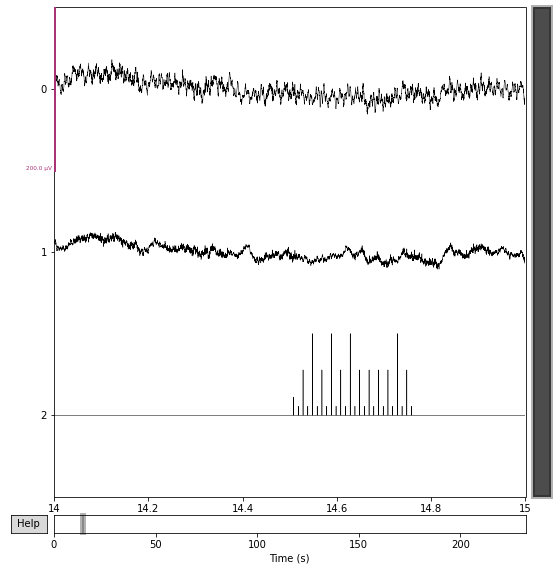

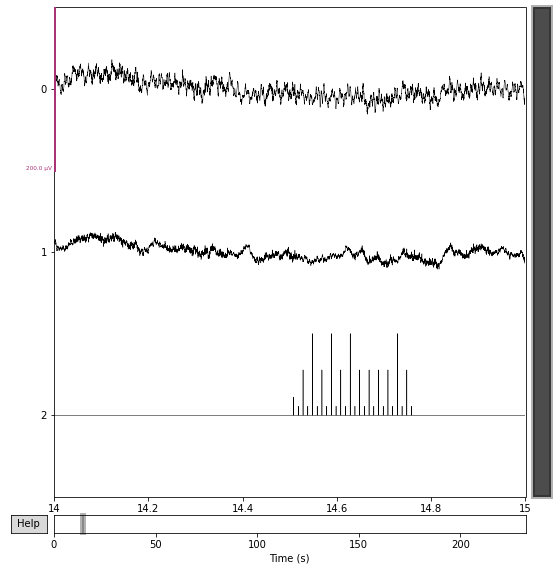

In [2]:
import os.path as op

import pyxdf

import mne
from mne.datasets import misc

fname = op.join(
    misc.data_path(), 'xdf',
    'sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf')
streams, header = pyxdf.load_xdf(fname)
data = streams[0]["time_series"].T
assert data.shape[0] == 5  # four raw EEG plus one stim channel
data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
data = data[::2]  # subselect
data[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
raw = mne.io.RawArray(data, info)
raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

## References
.. footbibliography::

